In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# uploading train dataset 
df = pd.read_csv('food_train.csv')

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


<h3> pre processing dataset for EDA

In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

<h3> checking null values 

In [6]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [7]:
# now i get null in this datasets as "NaN " so replace to a null values to indentify them
df = df.replace("NaN ",np.nan)

In [8]:
df.isna().sum()/df.shape[0]

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            0.040664
Delivery_person_Ratings        0.041849
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    0.037966
Time_Order_picked              0.000000
Weatherconditions              0.000000
Road_traffic_density           0.013182
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021780
Festival                       0.005001
City                           0.026320
Time_taken(min)                0.000000
dtype: float64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

<h3> Changing data type of columns for suitable for furtur process

In [11]:
#changing columns types as there suitable types and also chnges values which is has extra space.
df['Weatherconditions'] = df['Weatherconditions'].str.replace('conditions ','')
df['Time_taken(min)']  =  df['Time_taken(min)'].str.replace('(min) ','').astype(int)
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='coerce')
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  int32         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  datetime64[ns]
 10  Time_Order_picked            41368 non-null  datetime64[ns]
 11  Weatherconditions            41368 non-null  o

<h3> now getting time into multiple columns

In [13]:
# Time difference in minutes
df['Time_Diff_min'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60

# Extract useful ML features
df['Order_Hour'] = df['Time_Orderd'].dt.hour
df['Order_Minute'] = df['Time_Orderd'].dt.minute
df['Picked_Hour'] = df['Time_Order_picked'].dt.hour
df['Picked_Minute'] = df['Time_Order_picked'].dt.minute

<h3> Distance from Restaurant location to Delivery locations

In [14]:
from haversine import haversine, Unit

# Check if necessary columns exist
required_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']
columns_exist = all(col in df.columns for col in required_cols)

# If columns exist, compute the haversine distance
if columns_exist:
    def calculate_distance(row):
        restaurant_loc = (row['Restaurant_latitude'], row['Restaurant_longitude'])
        delivery_loc = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
        return haversine(restaurant_loc, delivery_loc, unit=Unit.KILOMETERS)

    # Apply the function to compute distances
    df['distance_km'] = df.apply(calculate_distance, axis=1)

# Return a sample of the result
df[['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'distance_km']].head() if columns_exist else "Required columns not found"

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km
0,22.745049,75.892471,22.765049,75.912471,3.025153
1,12.913041,77.683237,13.043041,77.813237,20.183558
2,12.914264,77.678400,12.924264,77.688400,1.552760
3,11.003669,76.976494,11.053669,77.026494,7.790412
4,12.972793,80.249982,13.012793,80.289982,6.210147


In [15]:
df['distance_km'] = df['distance_km'].round(2)
df['distance_km']

0         3.03
1        20.18
2         1.55
3         7.79
4         6.21
         ...  
45588     1.49
45589    11.01
45590     4.66
45591     6.23
45592    12.07
Name: distance_km, Length: 41368, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41368 entries, 0 to 45592
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           41368 non-null  object        
 1   Delivery_person_ID           41368 non-null  object        
 2   Delivery_person_Age          41368 non-null  int32         
 3   Delivery_person_Ratings      41368 non-null  float64       
 4   Restaurant_latitude          41368 non-null  float64       
 5   Restaurant_longitude         41368 non-null  float64       
 6   Delivery_location_latitude   41368 non-null  float64       
 7   Delivery_location_longitude  41368 non-null  float64       
 8   Order_Date                   41368 non-null  datetime64[ns]
 9   Time_Orderd                  41368 non-null  datetime64[ns]
 10  Time_Order_picked            41368 non-null  datetime64[ns]
 11  Weatherconditions            41368 non-null  o

<h2> Visualization

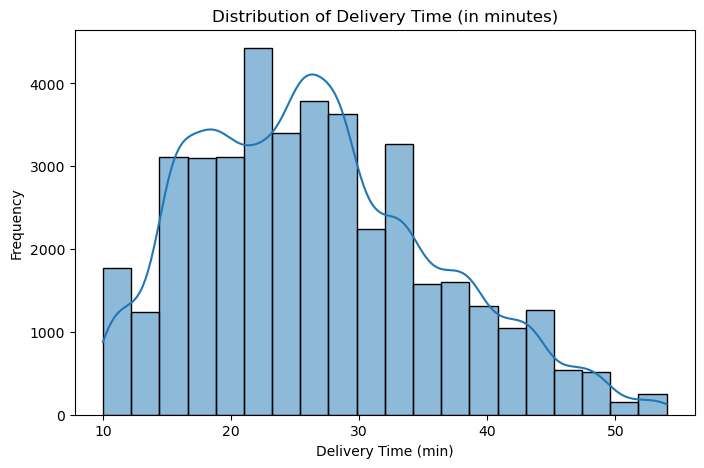

In [17]:
# 1.Distribution of Delivery Time
plt.figure(figsize=(8,5))
sns.histplot(df['Time_taken(min)'], bins=20, kde=True)
plt.title("Distribution of Delivery Time (in minutes)")
plt.xlabel("Delivery Time (min)")
plt.ylabel("Frequency")
plt.show()

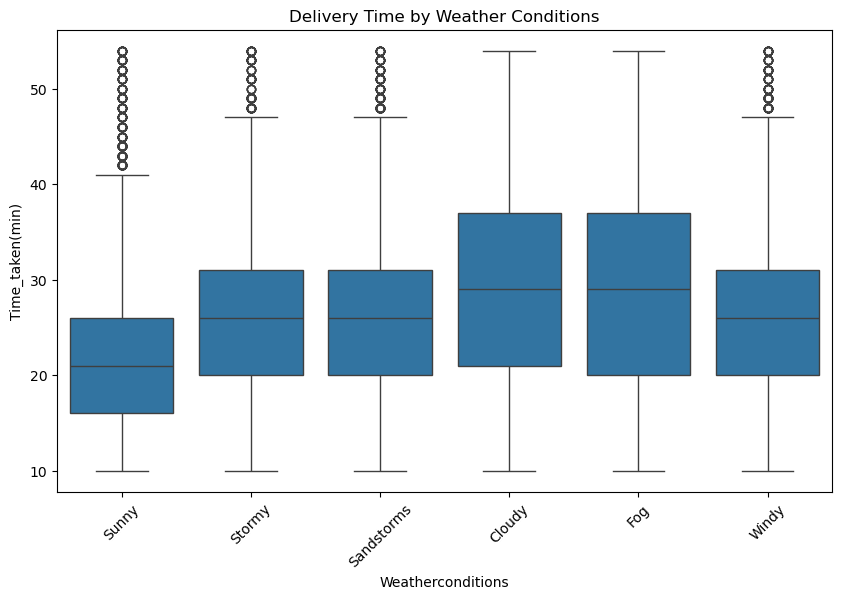

In [18]:
# 2.Effect of Weather Conditions
plt.figure(figsize=(10,6))
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=df)
plt.title("Delivery Time by Weather Conditions")
plt.xticks(rotation=45)
plt.show()


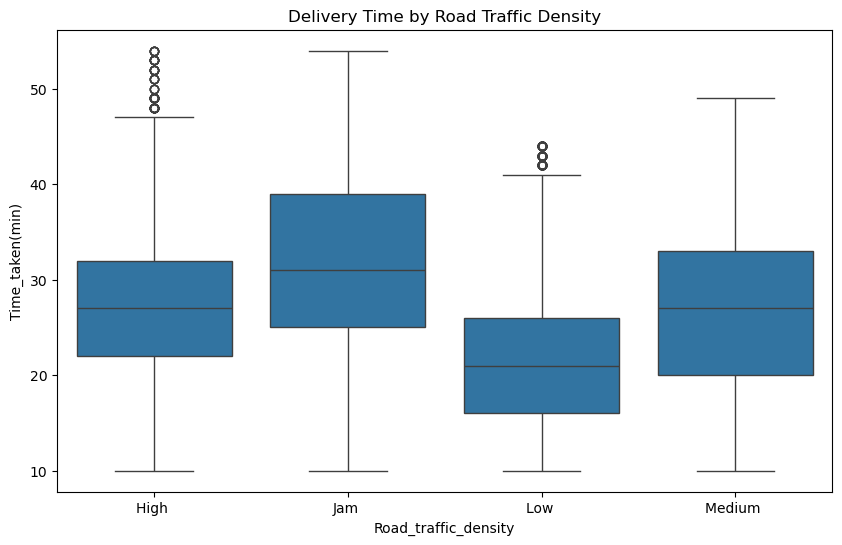

In [19]:
# 3.Impact of Road Traffic on Delivery Time
plt.figure(figsize=(10,6))
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=df)
plt.title("Delivery Time by Road Traffic Density")
plt.show()


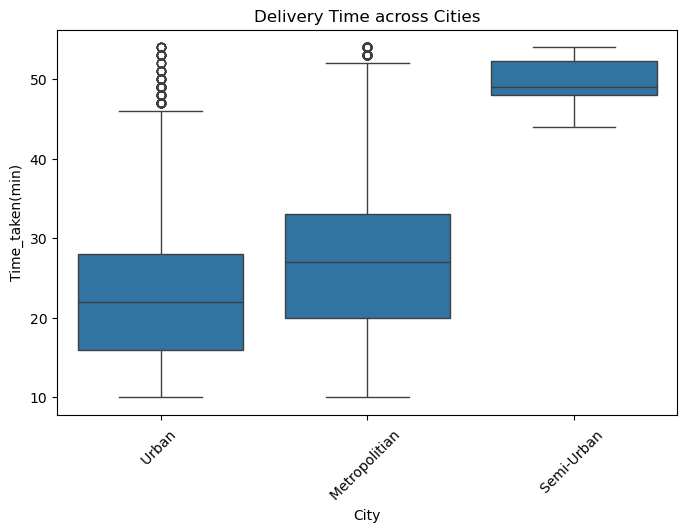

In [20]:
# 4.City-Wise Delivery Performance
plt.figure(figsize=(8,5))
sns.boxplot(x='City', y='Time_taken(min)', data=df)
plt.title("Delivery Time across Cities")
plt.xticks(rotation=45)
plt.show()


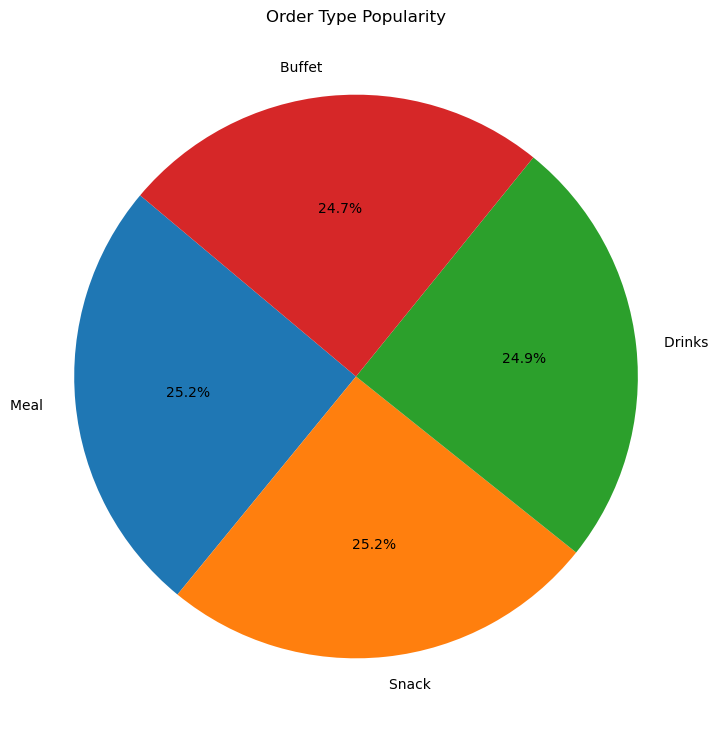

In [21]:
# 5.Order Type Popularity
order_counts  =  df['Type_of_order'].value_counts()

plt.figure(figsize=(8,9))
plt.pie(order_counts,labels=order_counts.index , autopct='%1.1f%%', startangle=140)
plt.title("Order Type Popularity")
plt.axis('equal')
plt.show()

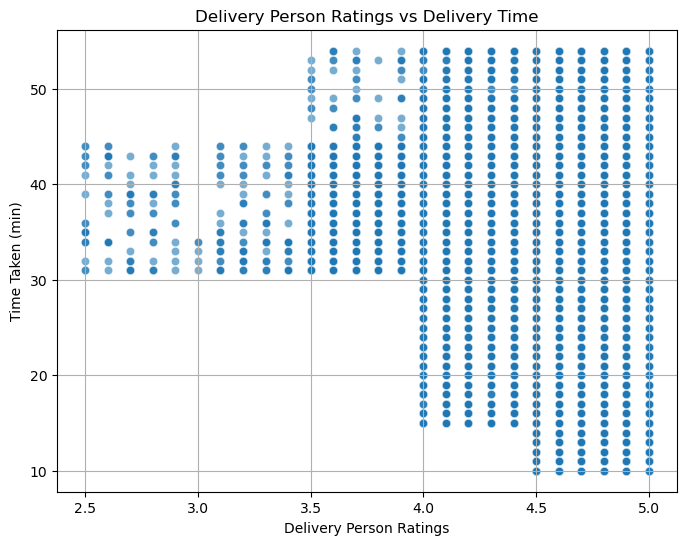

In [22]:
# 6. Ratings vs Delivery Time

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Delivery_person_Ratings',
    y='Time_taken(min)',
    alpha=0.6
)

plt.title('Delivery Person Ratings vs Delivery Time')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken (min)')
plt.grid(True)
plt.show()

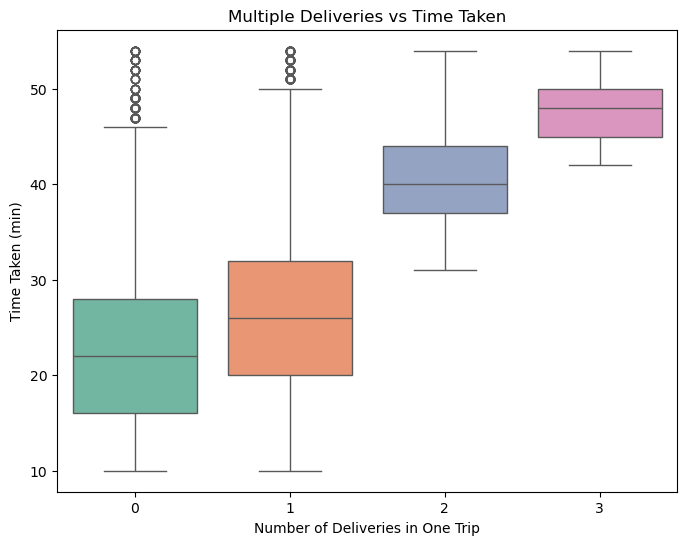

In [23]:
#7.Multiple Deliveries vs Time Taken

plt.figure(figsize=(8,6))
sns.boxplot( data=df , x='multiple_deliveries' , y='Time_taken(min)' , palette='Set2')
plt.title('Multiple Deliveries vs Time Taken')
plt.xlabel('Number of Deliveries in One Trip')
plt.ylabel('Time Taken (min)')
plt.show()


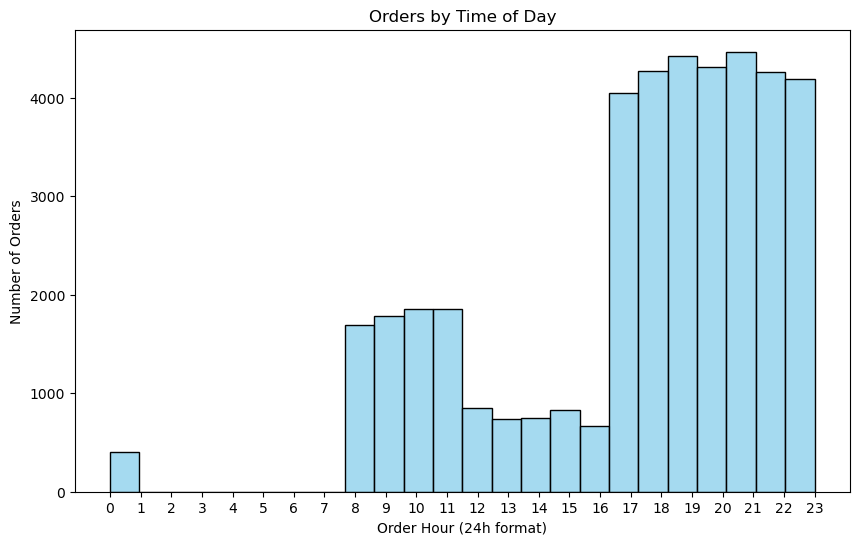

In [24]:
# 8 . Orders by Time of Day
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='Order_Hour',
    bins=24,
    kde=False,
    color='skyblue'
)

plt.title('Orders by Time of Day')
plt.xlabel('Order Hour (24h format)')
plt.ylabel('Number of Orders')
plt.xticks(range(0,24))
plt.show()


<Axes: xlabel='time_of_day', ylabel='count'>

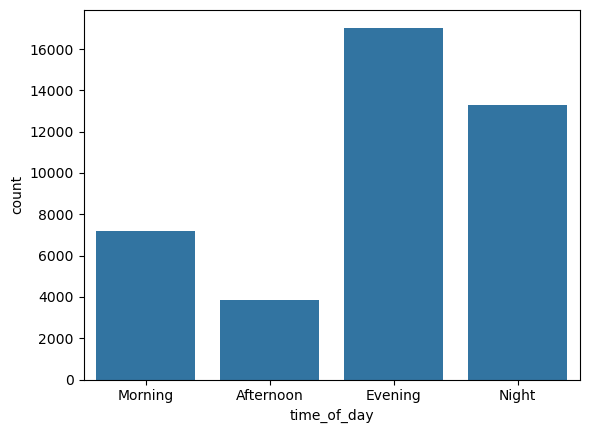

In [25]:
# 9 . Orders by Time of Day(using def there should be group in morning , afternoon, evening , night) 
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['Order_Hour'].apply(get_time_of_day)

sns.countplot(x='time_of_day', data=df, order=['Morning','Afternoon','Evening','Night'])



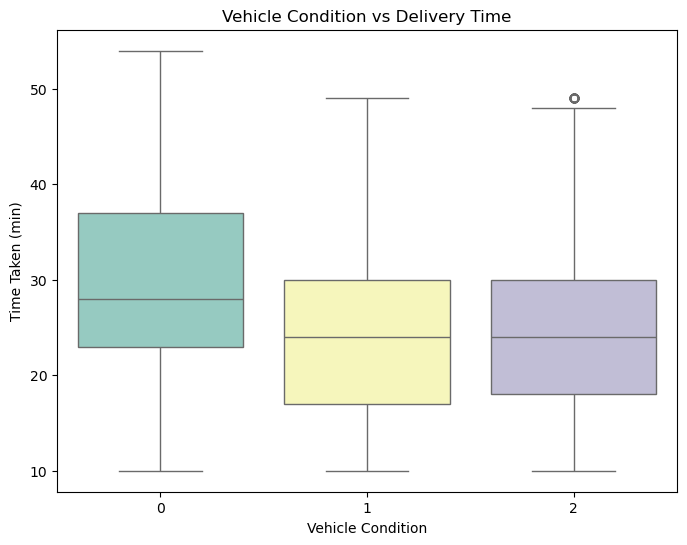

In [26]:
# 10. Vehicle Condition Impact 
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Vehicle_condition',
    y='Time_taken(min)',
    palette='Set3'
)

plt.title('Vehicle Condition vs Delivery Time')
plt.xlabel('Vehicle Condition')
plt.ylabel('Time Taken (min)')
plt.show()


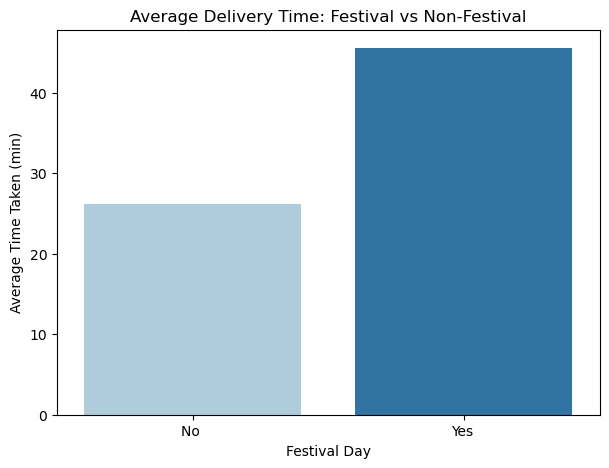

In [27]:
# 11. Festival vs Non-Festival Deliveries
avg_time_festival = df.groupby('Festival')['Time_taken(min)'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=avg_time_festival,
    x='Festival',
    y='Time_taken(min)',
    palette='Paired'
)
plt.title('Average Delivery Time: Festival vs Non-Festival')
plt.xlabel('Festival Day')
plt.ylabel('Average Time Taken (min)')
plt.show()


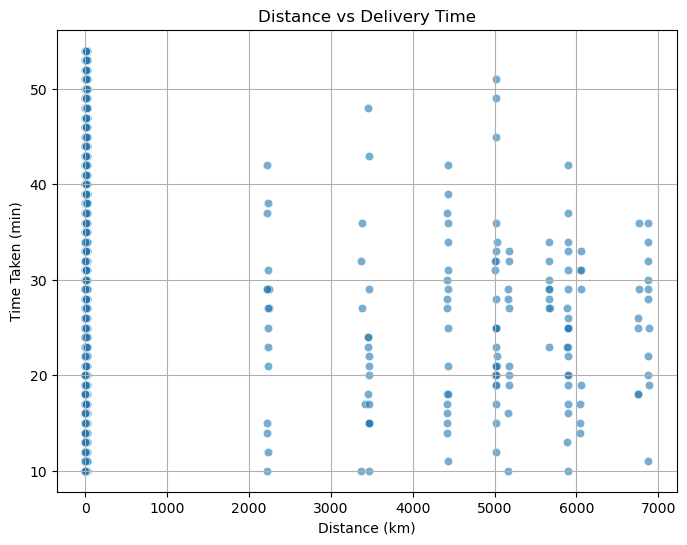

In [28]:
# 12. Distance vs Delivery Time
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='distance_km',  # Replace with your distance column name
    y='Time_taken(min)',
    alpha=0.6
)

plt.title('Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.grid(True)
plt.show()


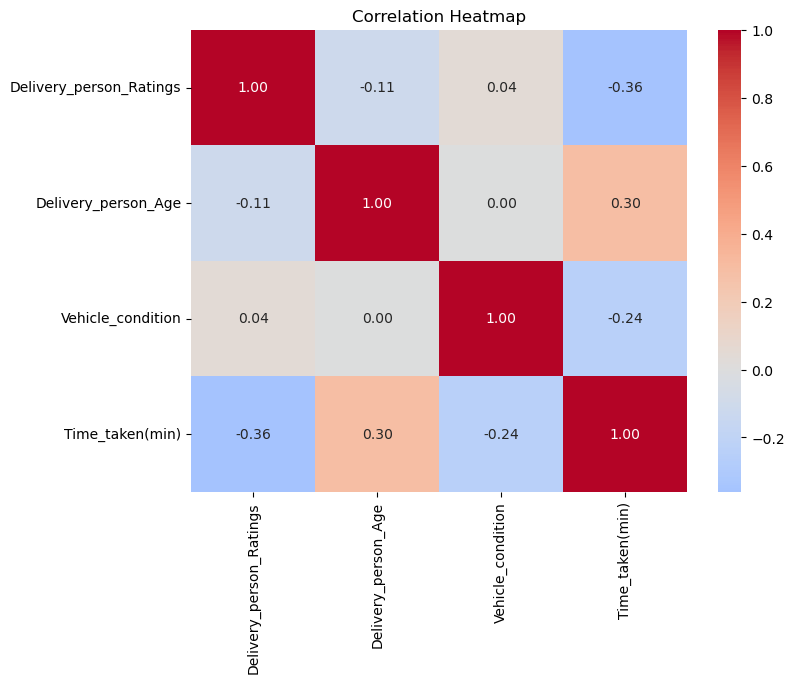

In [29]:
# 13. Heatmap of Correlation

numeric_cols = ['Delivery_person_Ratings', 'Delivery_person_Age',
                'Vehicle_condition', 'Time_taken(min)']  # adjust as per dataset

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()


<h1> Pre-processing for model

<h3>Now drop unwated columns for prediction

In [30]:
df.drop(columns=['ID','Delivery_person_ID','Time_Orderd', 'Time_Order_picked','Delivery_location_latitude','Delivery_location_longitude','Restaurant_latitude','Restaurant_longitude','Order_Date'],axis=1,inplace=True)

In [31]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'Time_Diff_min', 'Order_Hour', 'Order_Minute',
       'Picked_Hour', 'Picked_Minute', 'distance_km', 'time_of_day'],
      dtype='object')

<h3>Encoding columns into numeric values

In [32]:
col = df.select_dtypes(object).columns

for i in col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [33]:
df

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Time_Diff_min,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute,distance_km,time_of_day
0,37,4.9,4,0,2,3,1,0,0,2,24,15.0,11,30,11,45,3.03,2
1,34,4.5,3,1,2,3,2,1,0,0,33,5.0,19,45,19,50,20.18,1
2,23,4.4,2,2,0,1,1,1,0,2,26,15.0,8,30,8,45,1.55,2
3,38,4.7,4,3,0,0,1,1,0,0,21,10.0,18,0,18,10,7.79,1
4,32,4.6,0,0,1,3,2,1,0,0,30,15.0,13,30,13,45,6.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,5,0,1,2,1,0,0,0,32,10.0,11,35,11,45,1.49,2
45589,21,4.6,5,1,0,0,1,1,0,0,36,15.0,19,55,20,10,11.01,1
45590,30,4.9,0,2,1,1,2,0,0,0,16,-1425.0,23,50,0,5,4.66,3
45591,20,4.7,0,0,0,3,1,1,0,0,26,5.0,13,35,13,40,6.23,0


In [34]:
df.shape

(41368, 18)

<h2> split datasets into train and test

In [35]:
x = df.drop('Time_taken(min)',axis=1)
y = df['Time_taken(min)']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=51)
x_train.shape , y_test.shape

((28957, 17), (12411,))

<h2> Random Forest 

In [36]:
rf = RandomForestRegressor(n_estimators=200,random_state=51,max_depth=10,min_samples_leaf=1,min_samples_split=5)
rf

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=51)

In [37]:
# fitting spilt train data into random forest algorithm
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200,
                      random_state=51)

In [38]:
# checking how algorithm learn from the dataset
rf.score(x_train,y_train)

0.8602008872634804

In [39]:
# predicting columns for accuracy
y_pred = rf.predict(x_test)
y_pred

array([22.44885754, 15.38105819, 22.46264343, ..., 17.27139624,
       21.42985411, 24.37470097])

<h2> Checking accuracy for this algorithm

In [40]:
# checking accuracy of the algorithm on this dataset
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('mean_absolute_error',mae)
print('mean_squared_error',rmse)
print('r2_score',r2)

mean_absolute_error 3.0168452414963856
mean_squared_error 3.7426199210737807
r2_score 0.839872963316545


<h2>which feature have importance for this model

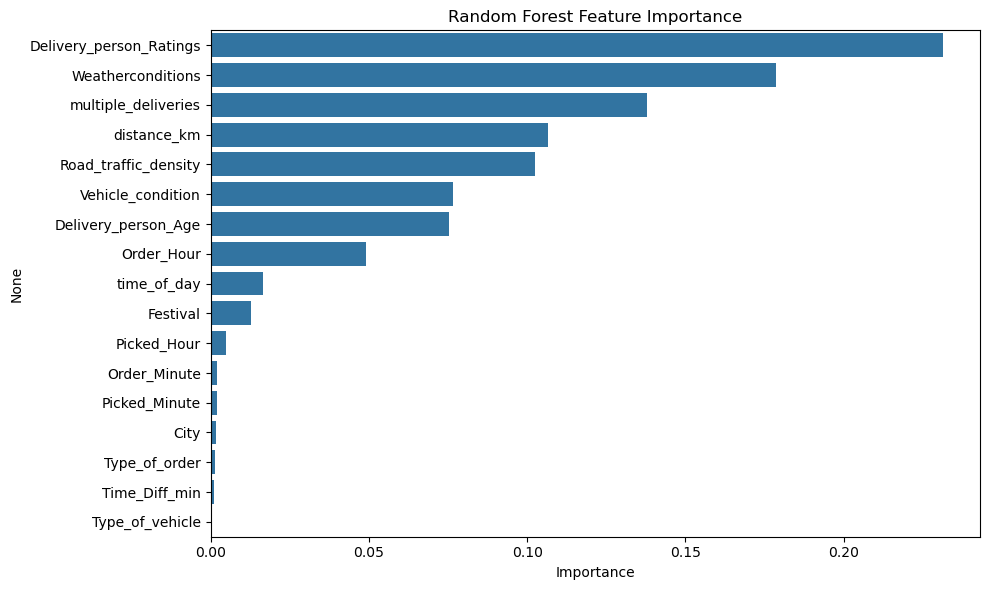

(3.0168452414963856, 3.7426199210737807, 0.839872963316545)

In [41]:
# checking Feature Importances
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

(mae, rmse, r2)